Median Housing Value vs Average Household Income

In [2]:
#Establish Dependencies
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as stats


In [4]:
#Import Summary CSV File

summary_df = pd.read_csv("../Final Output Data/summary_data.csv")
summary_df.head()

,County,Municipality,Location,Property Count,Mean Property Tax,Median Property Tax,Mean Market Value,Median Market Value,Serious Crimes,Auto Theft,Larceny,Total,Population,Avg. Income,2018 Avg Score,2019 Avg Score,School Count
0,MONMOUTH,ABERDEEN TWP,"40.436522, -74.234672",6335,7995.348783,8250.990,3.327775e+05,3.434176e+05,119.4,65.3,789.0,973.7,2573.0,47906.0,51.849535,63.898890,2.0
1,ATLANTIC,ABSECON CITY,"39.471343, -74.447517",3278,5580.447108,5573.360,1.804123e+05,1.801832e+05,351.3,60.6,2132.9,2544.8,34958.0,51397.0,41.017145,39.107800,2.0
2,BERGEN,ALLENDALE BORO,"41.032669, -74.133826",2250,15198.085404,13502.915,6.939892e+05,6.165828e+05,116.6,58.3,378.8,553.7,6674.0,105387.0,97.409063,97.112427,3.0
3,MONMOUTH,ALLENHURST BORO,0,298,14537.485000,12137.805,2.095602e+06,1.749684e+06,0.0,0.0,1229.5,1229.5,0.0,0.0,0.000000,0.000000,0.0
4,MONMOUTH,ALLENTOWN BORO,"40.135366, -74.098050",594,8833.407104,8545.440,2.952858e+05,2.856596e+05,110.6,0.0,221.2,331.8,933.0,117071.0,0.000000,0.000000,0.0


In [11]:
summary_df = summary_df[(summary_df['Avg. Income'] != 0)]
summary_df.head()

,County,Municipality,Location,Property Count,Mean Property Tax,Median Property Tax,Mean Market Value,Median Market Value,Serious Crimes,Auto Theft,Larceny,Total,Population,Avg. Income,2018 Avg Score,2019 Avg Score,School Count
0,MONMOUTH,ABERDEEN TWP,"40.436522, -74.234672",6335,7995.348783,8250.990,332777.470735,343417.611639,119.4,65.3,789.0,973.7,2573.0,47906.0,51.849535,63.898890,2.0
1,ATLANTIC,ABSECON CITY,"39.471343, -74.447517",3278,5580.447108,5573.360,180412.307634,180183.185937,351.3,60.6,2132.9,2544.8,34958.0,51397.0,41.017145,39.107800,2.0
2,BERGEN,ALLENDALE BORO,"41.032669, -74.133826",2250,15198.085404,13502.915,693989.241467,616582.779282,116.6,58.3,378.8,553.7,6674.0,105387.0,97.409063,97.112427,3.0
4,MONMOUTH,ALLENTOWN BORO,"40.135366, -74.098050",594,8833.407104,8545.440,295285.849950,285659.597003,110.6,0.0,221.2,331.8,933.0,117071.0,0.000000,0.000000,0.0
5,WARREN,ALPHA BORO,"40.708224, -75.147074",804,5821.718843,5722.710,175617.249430,172630.560928,349.6,0.0,1311.1,1660.7,28925.0,44092.0,41.698536,47.710191,11.0


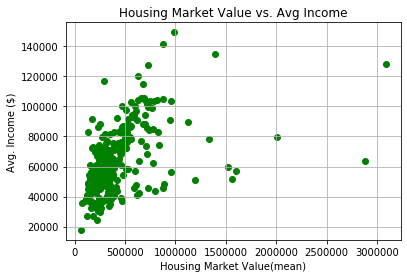

In [13]:
#Create Mean Property Tax vs Avg Income Scatter Plot

plt.scatter(summary_df["Mean Market Value"],summary_df["Avg. Income"],c='g')

#Create Chart Title and Axis Titles

plt.title("Housing Market Value vs. Avg Income")
plt.xlabel("Housing Market Value(mean)")
plt.ylabel("Avg. Income ($)")
plt.grid(True)
          
#Save chart as .PNG File
          
plt.savefig("../Final Summary Data/Mkt Val vs Avg Income Scatter.png")
          
plt.show()

In [14]:
#Determine Coreelations for all measures in Summary DF

summary_df.corr()

#Correlation between Mean Market Value and Avg Income is .46

,Property Count,Mean Property Tax,Median Property Tax,Mean Market Value,Median Market Value,Serious Crimes,Auto Theft,Larceny,Total,Population,Avg. Income,2018 Avg Score,2019 Avg Score,School Count
Property Count,1.000000,-0.110250,-0.115789,-0.093646,-0.096963,0.082457,0.077212,0.006259,0.030169,0.682531,-0.145152,-0.090784,-0.077291,0.568707
Mean Property Tax,-0.110250,1.000000,0.979844,0.642470,0.664254,-0.337507,0.009317,-0.265436,-0.289569,-0.126364,0.710043,0.543239,0.543740,-0.114205
Median Property Tax,-0.115789,0.979844,1.000000,0.560551,0.600543,-0.357849,-0.003297,-0.285507,-0.311260,-0.117070,0.696745,0.533178,0.536714,-0.102089
Mean Market Value,-0.093646,0.642470,0.560551,1.000000,0.993656,-0.128136,0.192788,0.059222,0.031678,-0.148855,0.461597,0.387997,0.376890,-0.130009
Median Market Value,-0.096963,0.664254,0.600543,0.993656,1.000000,-0.153650,0.182286,0.047077,0.015238,-0.151201,0.487795,0.414333,0.404507,-0.131584
Serious Crimes,0.082457,-0.337507,-0.357849,-0.128136,-0.153650,1.000000,0.543285,0.674438,0.812151,0.175867,-0.405347,-0.360813,-0.343062,0.221829
Auto Theft,0.077212,0.009317,-0.003297,0.192788,0.182286,0.543285,1.000000,0.295648,0.438392,0.218204,-0.171857,-0.195167,-0.188917,0.270441
Larceny,0.006259,-0.265436,-0.285507,0.059222,0.047077,0.674438,0.295648,1.000000,0.975984,0.034414,-0.302800,-0.187732,-0.181731,0.060390
Total,0.030169,-0.289569,-0.311260,0.031678,0.015238,0.812151,0.438392,0.975984,1.000000,0.085161,-0.348936,-0.248734,-0.239324,0.120561
Population,0.682531,-0.126364,-0.117070,-0.148855,-0.151201,0.175867,0.218204,0.034414,0.085161,1.000000,-0.197410,-0.170682,-0.151749,0.915036


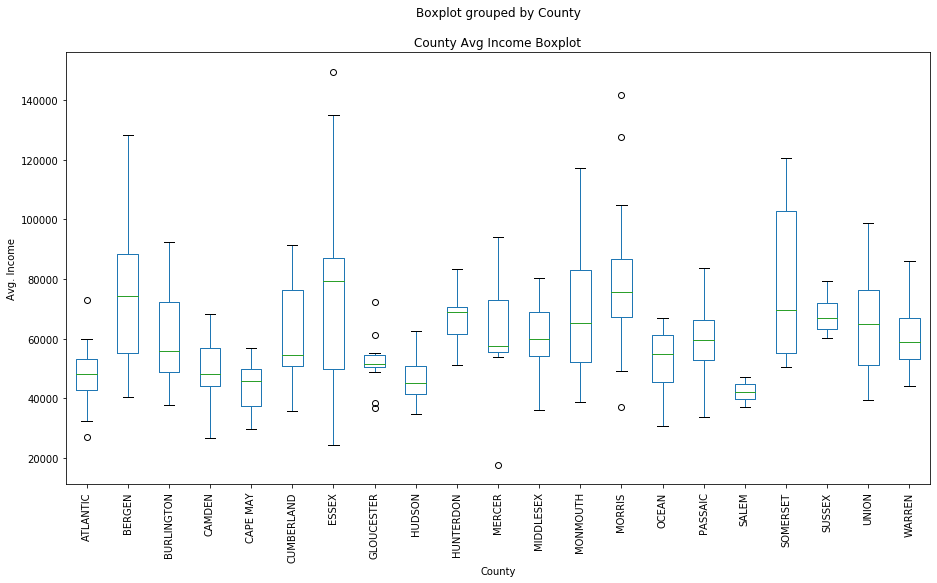

In [15]:
#Create boxplot by county for median housing value

summary_df.boxplot(by ='County', column =['Avg. Income'], grid = False , figsize=(15,8)) 

#Add titles and rotate x ticks

plt.xticks(rotation=90)
plt.title("County Avg Income Boxplot")
plt.xlabel("County")
plt.ylabel("Avg. Income")

#Save figure as png file

plt.savefig("../Final Summary Data/County Avg Income Boxplot.png")

#Show Boxplot

plt.show()